In [1]:
import sys
sys.path.insert(0, '../src/')
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import scipy.sparse as sp
from scipy.sparse import load_npz
import graph_statistics
import utils
from evaluation import (Evaluation, tabular_from_statistics, df_from_tabular, compute_original_statistics,
                        boxplot)

# Statistics

In [2]:
statistic_fns = {#'Assortativity':graph_statistics.assortativity,
                 #'Average Degree':graph_statistics.average_degree,
                 'Claw Count':graph_statistics.claw_count,
                 #'Clustering Coefficient':graph_statistics.clustering_coefficient,
                 #'Characteristic Path Length':graph_statistics.compute_cpl,
                 #'Edge Distribution Entropy':graph_statistics.edge_distribution_entropy,
                 #'Gini':graph_statistics.gini,
                 #'LCC Size':graph_statistics.LCC,
                 #'Max Degree':graph_statistics.max_degree,
                 #'Min Degree':graph_statistics.min_degree,
                 #'Num Connected Components':graph_statistics.num_connected_components,
                 #'Power Law α':graph_statistics.power_law_alpha,
                 #'Spectral Gap':graph_statistics.spectral_gap,
                 'Square Count':graph_statistics.square_count,
                 #'Triangle Count':graph_statistics.triangle_count,
                 'Wedge Count':graph_statistics.wedge_count,
                 }

## Ours

In [3]:
eval_ours = Evaluation(experiment_root='../logs/CORA-ML/Ours/',
                       statistic_fns=statistic_fns)

In [4]:
eval_ours.compute_statistics()

In [5]:
eval_ours.aggregate_statistics(num_bins=10)

## Ours Test

In [6]:
eval_ours_test = Evaluation(experiment_root='../logs/CORA-ML/Ours_test_loss/',
                            statistic_fns=statistic_fns)
eval_ours_test.compute_statistics()
eval_ours_test.aggregate_statistics(num_bins=10)

In [7]:
graphs, stats = eval_ours_test.get_specific_overlap_graph(.7)

## Netgan

In [8]:
eval_netgan = Evaluation(experiment_root='../logs/CORA-ML/baseline_NetGan/',
                         statistic_fns=statistic_fns)

In [9]:
eval_netgan.compute_statistics()

FileNotFoundError: [Errno 2] No such file or directory: '../logs/CORA-ML/baseline_NetGan/Experiment_0/sampled_graphs/overlap.pickle'

In [ ]:
eval_netgan.aggregate_statistics(num_bins=10)

## Forge Adjacency 

In [8]:
eval_fa = Evaluation(experiment_root='../logs/CORA-ML/baseline_FA/',
                     statistic_fns=statistic_fns)

In [9]:
eval_fa.compute_statistics()

In [10]:
eval_fa.aggregate_statistics(num_bins=10)

## Forge Transition

In [11]:
eval_ft = Evaluation(experiment_root='../logs/CORA-ML/baseline_FT/',
                     statistic_fns=statistic_fns)

In [12]:
eval_ft.compute_statistics()

In [13]:
eval_ft.aggregate_statistics(num_bins=10)

## Forge Symmetric Laplacian

In [14]:
eval_fs = Evaluation(experiment_root='../logs/CORA-ML/baseline_FS/',
                     statistic_fns=statistic_fns)

In [15]:
eval_fs.compute_statistics()

In [16]:
eval_fs.aggregate_statistics(num_bins=10)

## Forge Modularity Matrix

In [17]:
eval_fm = Evaluation(experiment_root='../logs/CORA-ML/baseline_FM/',
                     statistic_fns=statistic_fns)

In [18]:
eval_fm.compute_statistics()

In [19]:
eval_fm.aggregate_statistics(num_bins=10)

## Configuration Model

In [20]:
eval_conf = Evaluation(experiment_root='../logs/CORA-ML/baseline_conf/',
                       statistic_fns=statistic_fns)

In [21]:
eval_conf.compute_statistics()

In [22]:
eval_conf.aggregate_statistics(num_bins=10)

# Summary

In [25]:
tabular = tabular_from_statistics(EO_criterion=0.5,
                                  statistics={'ours': eval_ours.mean_std,
                                              'ours_test': eval_ours_test.mean_std,
                                              #'netgan': eval_netgan.mean_std,
                                              'fa': eval_fa.mean_std,
                                              'ft': eval_ft.mean_std,
                                              'fs': eval_fs.mean_std,
                                              'fm': eval_fm.mean_std,
                                              'conf': eval_conf.mean_std
                                             })

In [26]:
df = df_from_tabular(tabular)

In [27]:
df

,Claw Count,Square Count,Wedge Count,Edge Overlap (%),ROC-AUC Score,Average Precision,Time (s)
ours,1738945.600 ± 238717.883,6755.950 ± 505.775,81647.350 ± 2806.074,0.551 ± 0.008,0.925 ± 0.005,0.933 ± 0.005,14.253 ± 0.175
ours_test,1980118.400 ± 296499.610,7073.800 ± 161.327,84063.400 ± 2857.278,0.556 ± 0.003,0.924 ± 0.004,0.934 ± 0.003,14.460 ± 0.155
fa,489182.050 ± 61525.613,1128.950 ± 78.341,48245.750 ± 930.903,0.525 ± 0.005,0.565 ± 0.000,0.660 ± 0.000,2.193 ± 0.057
ft,724098.000 ± 104610.585,1547.600 ± 82.679,57796.250 ± 1475.635,0.560 ± 0.005,0.706 ± 0.000,0.793 ± 0.000,2.031 ± 0.106
fs,1524738.500 ± 185145.351,2133.450 ± 164.138,77062.600 ± 2337.801,0.529 ± 0.005,0.788 ± 0.000,0.847 ± 0.000,2.278 ± 0.083
fm,489679.850 ± 62757.346,1112.000 ± 56.135,48225.300 ± 1168.063,0.523 ± 0.005,0.564 ± 0.000,0.659 ± 0.000,2.189 ± 0.051
conf,2693617.350 ± 89329.125,3148.600 ± 205.397,97634.150 ± 905.817,0.504 ± 0.001,NaN,NaN,0.115 ± 0.013


# True graph

In [29]:
_A_obs = load_npz('../data/CORA_ML.npz')

In [30]:
val_share = 0.1
test_share = 0.05
seed = 481516234

train_ones, val_ones, val_zeros, test_ones, test_zeros = utils.train_val_test_split_adjacency(_A_obs, val_share, test_share, seed, undirected=True, connected=True, asserts=False)

train_graph = sp.csr_matrix((np.ones(len(train_ones)),(train_ones[:,0], train_ones[:,1])))
assert (train_graph.toarray() == train_graph.toarray().T).all()

In [31]:
original_statistics = compute_original_statistics(original_graph=train_graph, statistic_fns=statistic_fns)

# BOXPLOTS

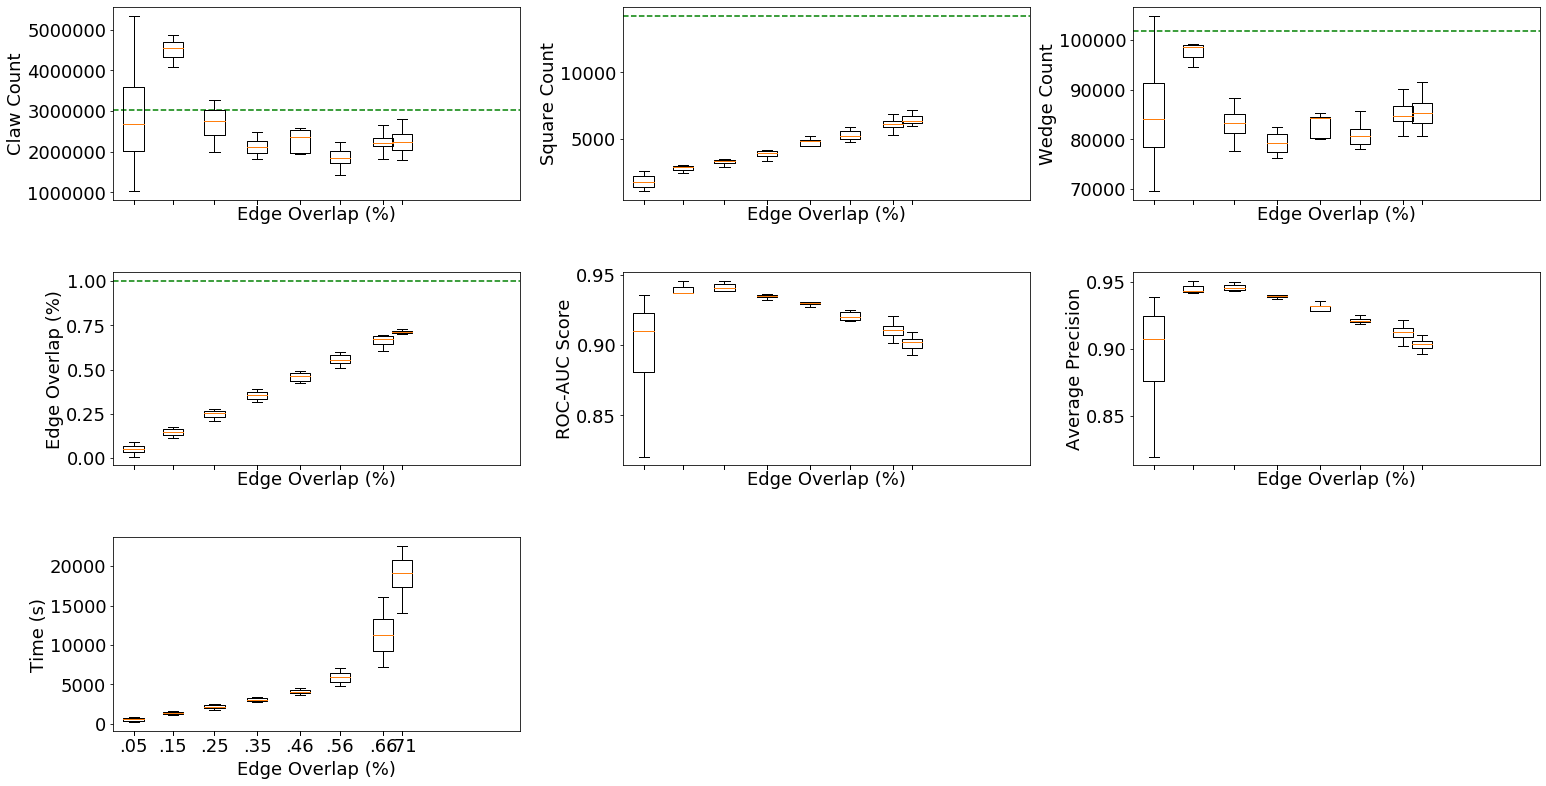

In [32]:
boxplot(statistics_binned=eval_netgan.statistics_binned, original_statistics=original_statistics, save_path='../fig/netgan.pdf')

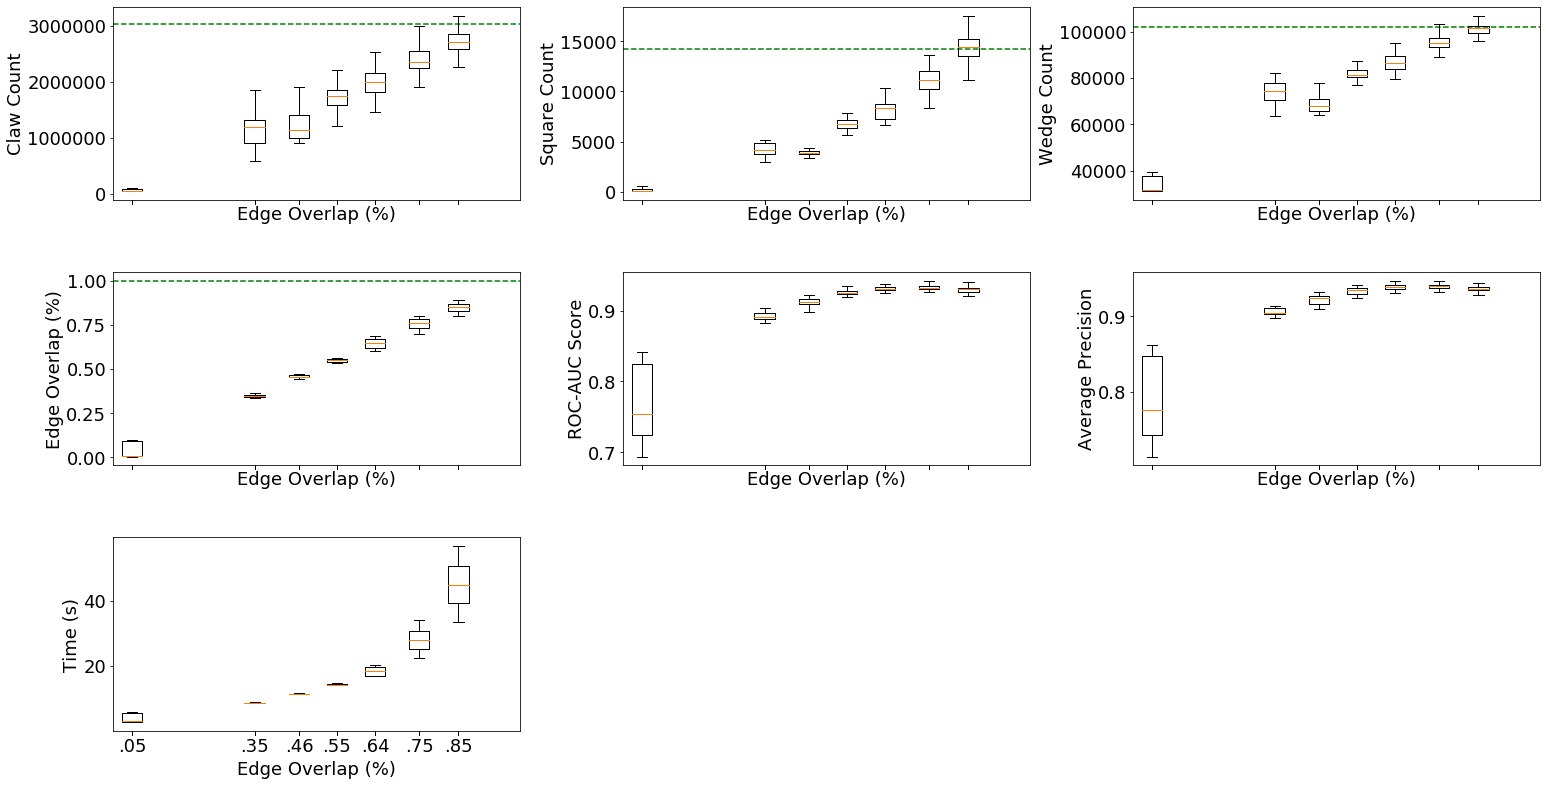

In [33]:
boxplot(statistics_binned=eval_ours.statistics_binned, original_statistics=original_statistics, save_path='../fig/ours.pdf')